In [23]:
import numpy
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline
import IPython.display as ipd

In [24]:
sr = 22050 # sample rate
T = 2.0    # seconds
f = 110    # 110 Hz
# time variable
t = numpy.linspace(0, T, int(T*sr), endpoint=False)
#wave = 0.5*numpy.sin(2 * numpy.pi * f * t)
wave = signal.sawtooth(2 * numpy.pi * f * t)

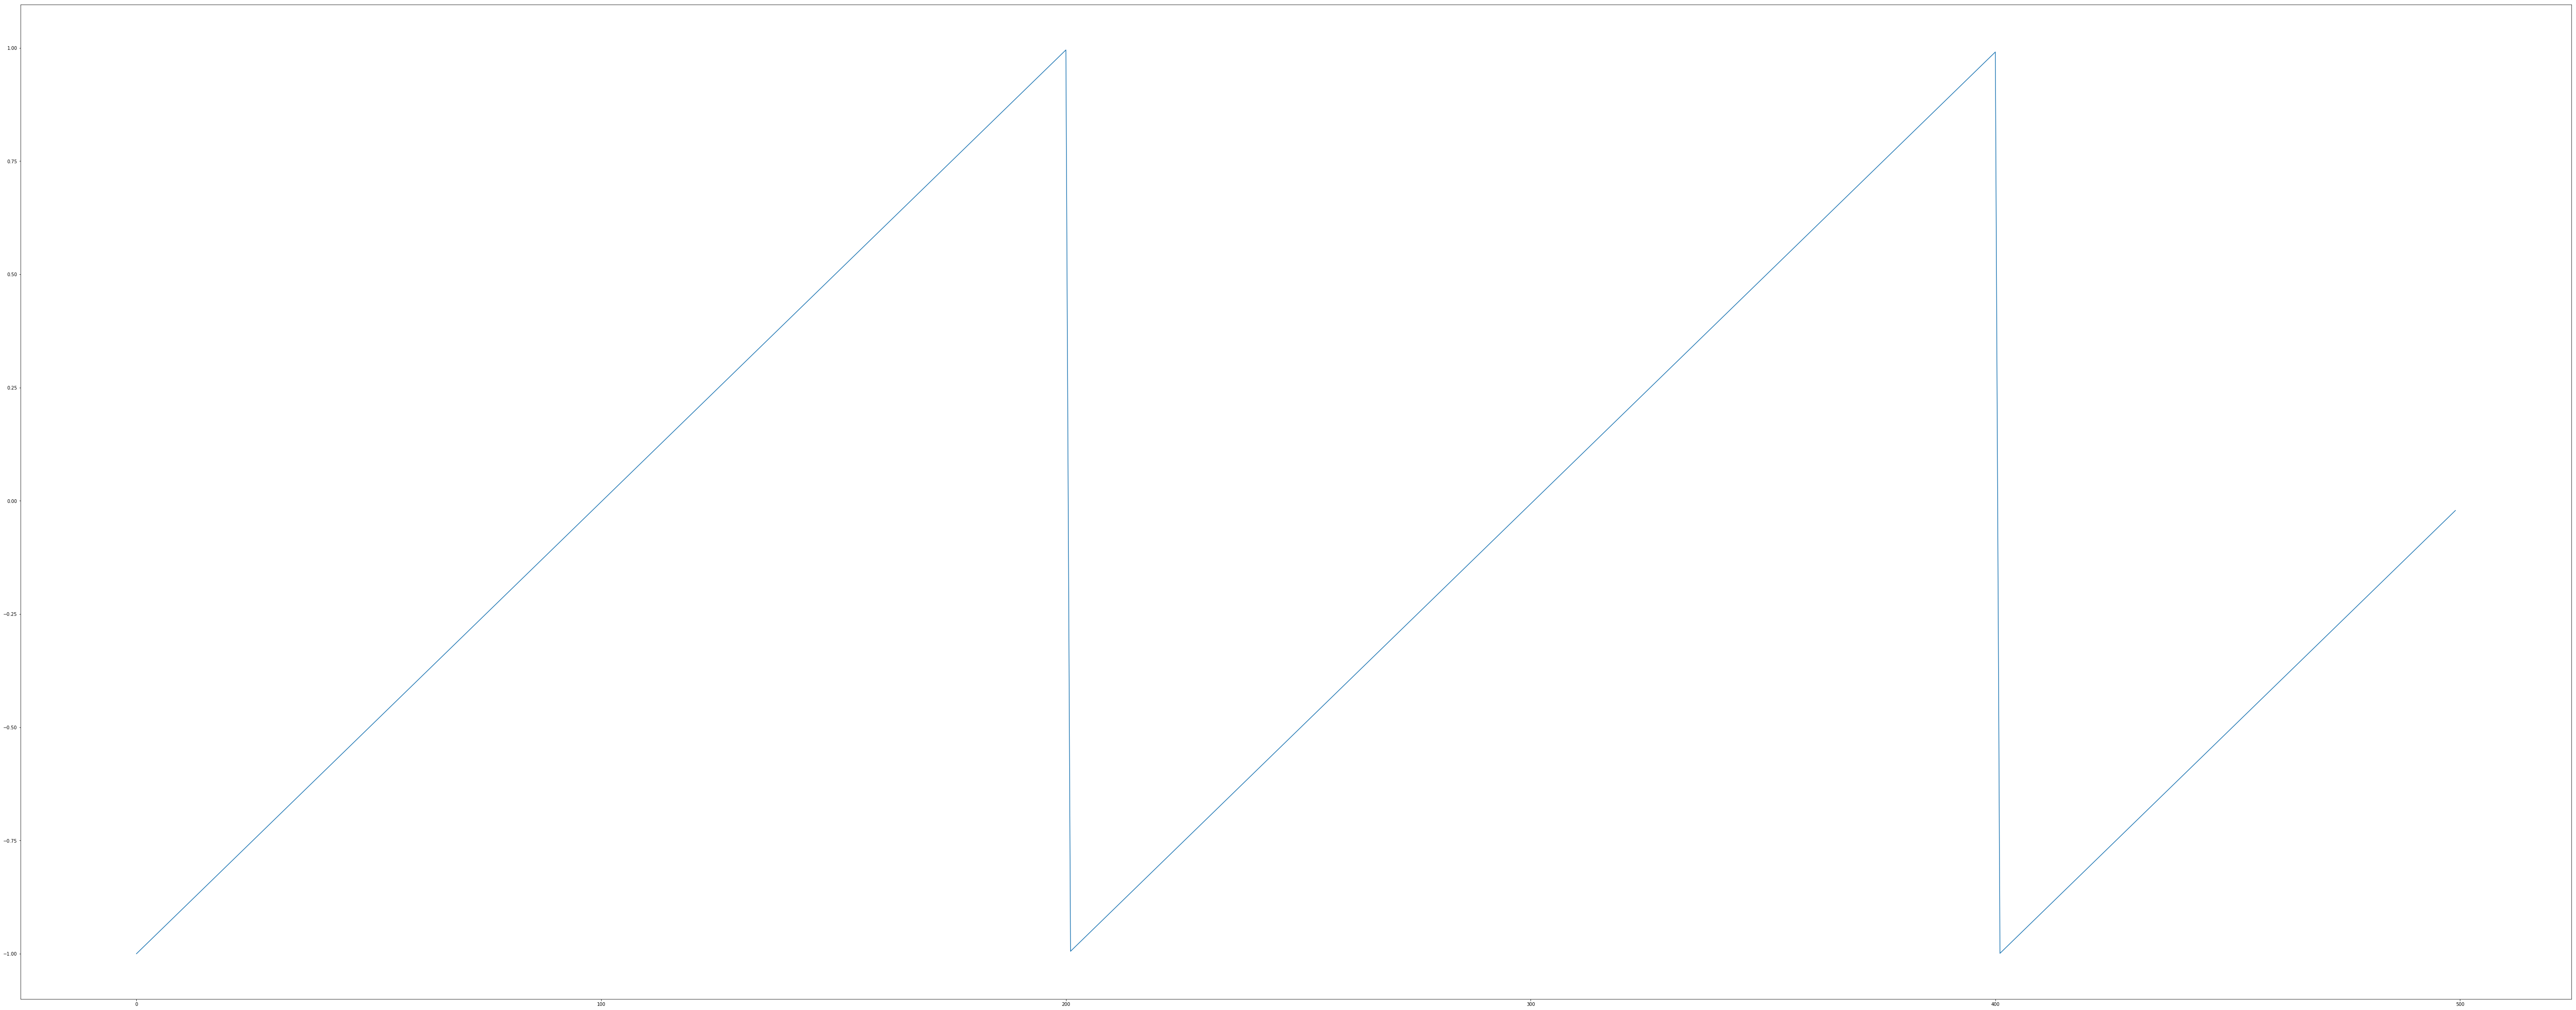

In [25]:
plt.figure(figsize=(100, 40))
plt.plot(wave[:500])
plt.show()

In [26]:
ipd.Audio(wave, rate=sr) # load a NumPy array

In [37]:
# pd == 0.3, pd_out = 1.0-0.3 = 0.7
#   in==0.3  -> out = 0.7
#   in==0.15 -> out = 0.15 * (0.7 / 0.3) = 0.35
#   in==0.65 -> out = 0.7 + (0.65 - 0.3) / (0.7 / 0.3) = 0.85


def phase_dist(phase, pd):
    # convert to 0.0 .. 1.0 range
    phase = (1.0 + phase) / 2;
    pd_out = 1.0 - pd;
    pd_scale = (pd_out / pd);
    if phase < pd:  # 1st phase segment
        # linear 0.0 ... pd
        phase = phase * pd_scale;
    else:           # 2nd phase segment
        # linear pd .. 1.0
        phase = pd_out + (phase - pd) / pd_scale;
        
    # convert to -1.0 .. 1.0 range
    return (phase * 2.0) - 1.0

v_dist = numpy.vectorize(phase_dist, excluded=['pd'])
d_wave_25 = v_dist(wave, pd=0.25)
d_wave_50 = v_dist(wave, pd=0.50)
d_wave_75 = v_dist(wave, pd=0.75)

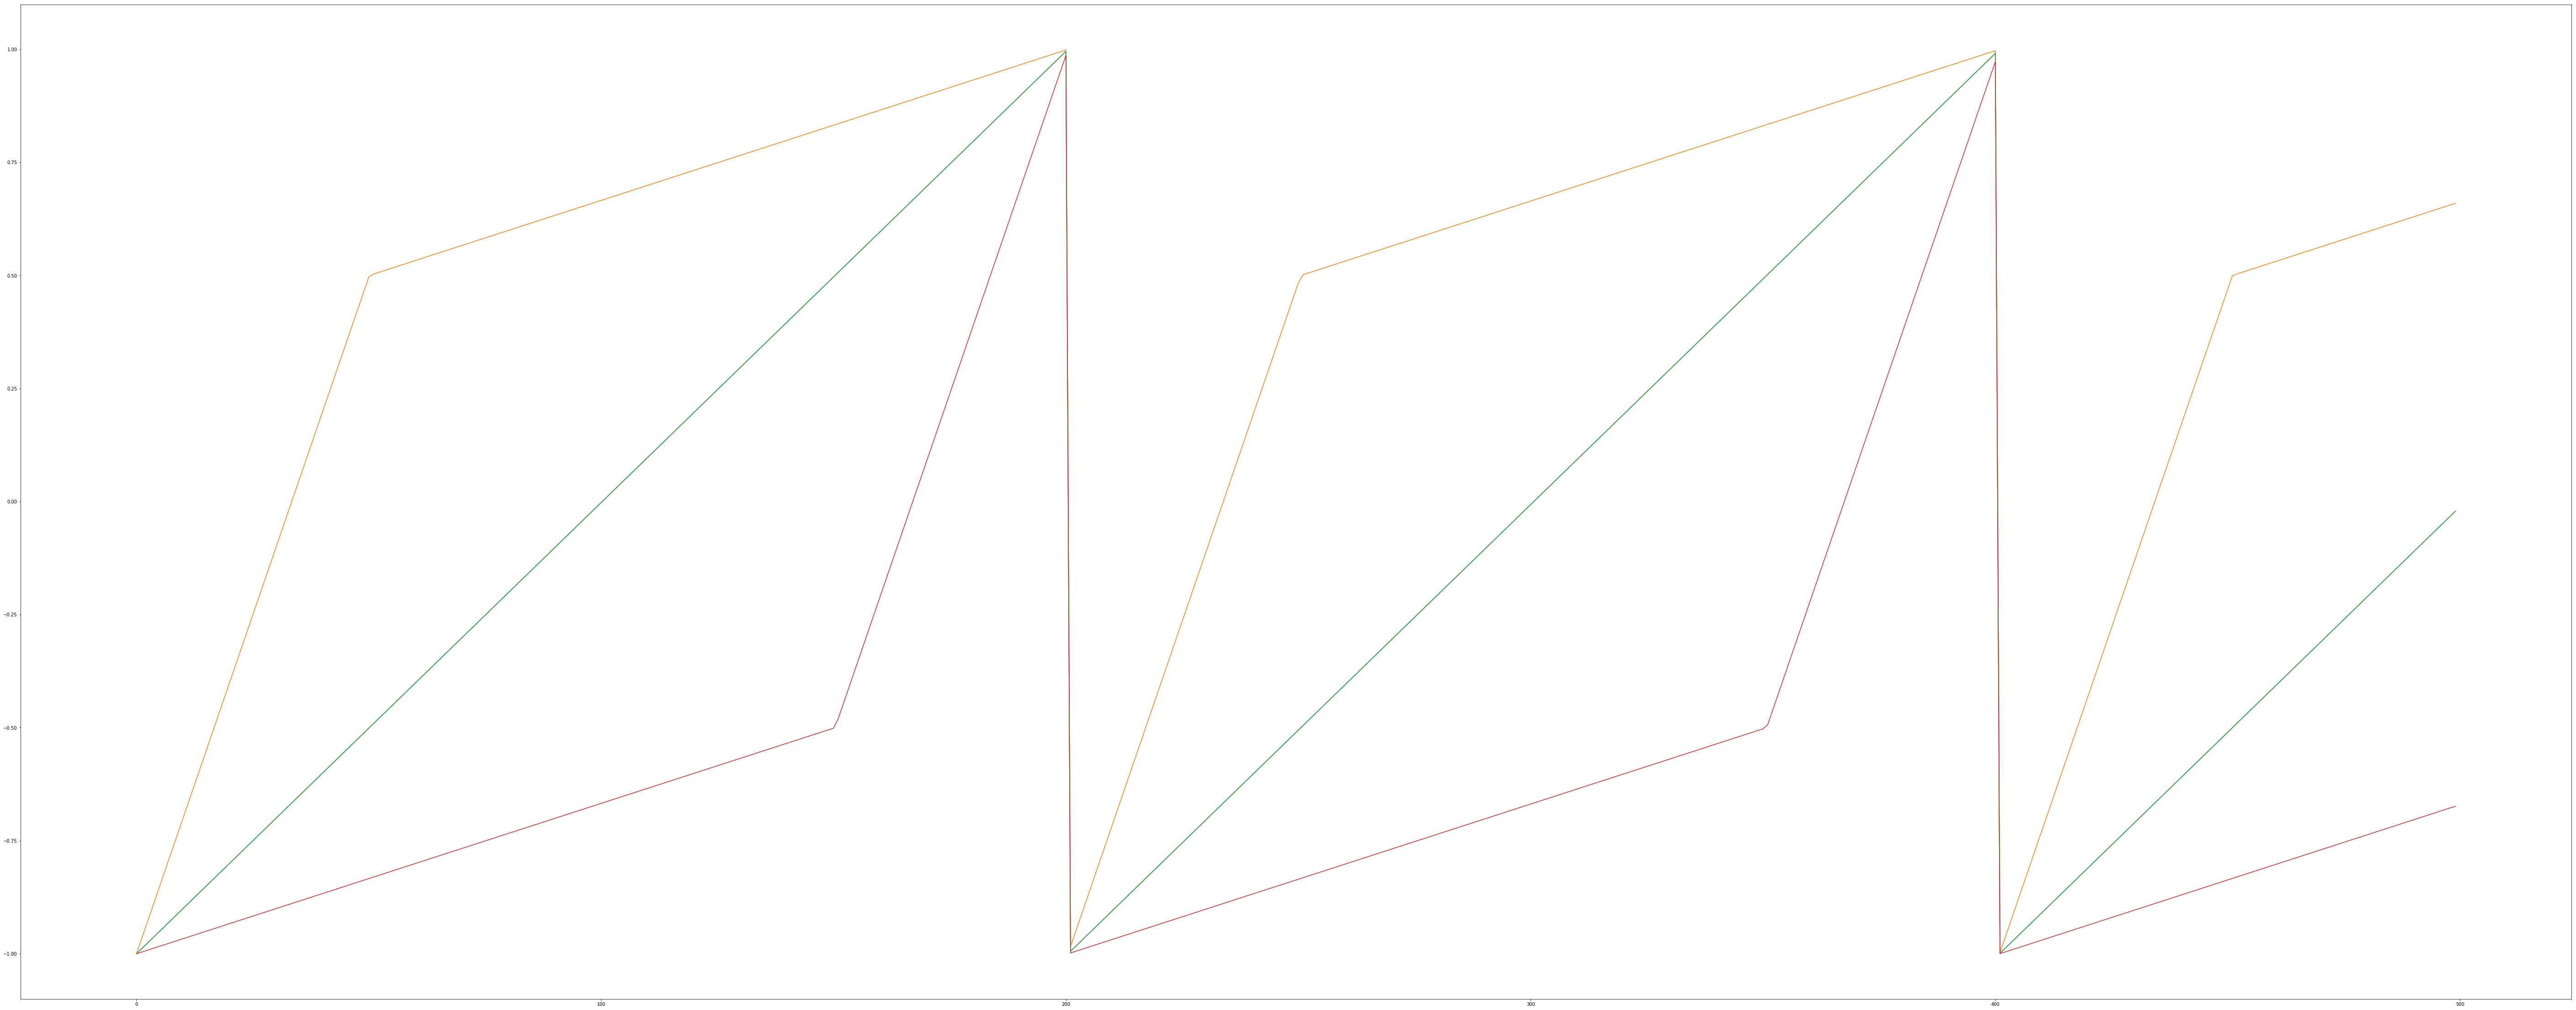

In [38]:
plt.figure(figsize=(100, 40))
plt.plot(wave[:500])
plt.plot(d_wave_25[:500])
plt.plot(d_wave_50[:500])
plt.plot(d_wave_75[:500])
plt.show()

In [36]:
ipd.Audio(d_wave_25, rate=sr)

In [32]:
ipd.Audio(d_wave_50, rate=sr)

In [33]:
ipd.Audio(d_wave_75, rate=sr)